In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [12]:
df=pd.read_csv('/Users/lordkersting/Downloads/Wine.csv')


In [13]:
df.shape


(178, 14)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [15]:
df.describe()


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
X=df.drop(['class'],axis=1)
y=df['class']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [20]:
# Now use PCA to see which features are most influential:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

# Create a DataFrame to show feature contributions to each PC
pca_components = pd.DataFrame(
    pca.components_,  # Rows are PCs, columns are features
    columns=X_train.columns,  # Feature names as columns
    index=[f'PC{i+1}' for i in range(len(pca.components_))]  # Naming PCs
)

# Display PCA component breakdown
print(pca_components)


       Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
PC1   0.001689   -0.000593  0.000164          -0.004846   0.016632   
PC2   0.001001    0.002538  0.003800           0.022950   0.999458   
PC3   0.011275    0.108967  0.045262           0.927483  -0.026111   
PC4  -0.145721   -0.163461  0.010792           0.359979   0.004882   
PC5  -0.028647   -0.712581  0.012637           0.071176  -0.005691   
PC6   0.197373    0.646416  0.031930           0.023118  -0.004467   
PC7  -0.898063    0.163875 -0.072364          -0.032372  -0.002751   
PC8  -0.349815    0.071379  0.176626          -0.029044   0.004830   
PC9  -0.091547    0.011257 -0.128995           0.008865   0.002022   
PC10 -0.031587   -0.007100 -0.060156          -0.001993  -0.000390   
PC11  0.021611    0.010241 -0.950512           0.045070   0.003016   
PC12 -0.004289    0.059143 -0.099778           0.005254   0.000231   
PC13  0.010307   -0.006748 -0.162852           0.002538   0.002346   

      Total phenols

In [21]:
# The two strongest features are Proline and Magnesium; however for pedagogical purposes we somewhat arbitrarily choose 2 of the weaker features 
chosen_features = ['Flavanoids', 'OD280/OD315 of diluted wines']
X_train_reduced=X_train[chosen_features]
X_test_reduced = X_test[chosen_features]

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting model
gbdt_1 = GradientBoostingClassifier(n_estimators=5, learning_rate=0.1, max_depth=1, min_samples_split=2, random_state=42)

# Train the model using the reduced feature set
gbdt_1.fit(X_train_reduced, y_train)

# Measure accuracy
print(f"Train Accuracy: {accuracy_score(y_train, gbdt_1.predict(X_train_reduced)):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, gbdt_1.predict(X_test_reduced)):.4f}")

Train Accuracy: 0.8451
Test Accuracy: 0.7500


In [34]:
# Initialize the overfit Gradient Boosting model
gbdt_2 = GradientBoostingClassifier(n_estimators=200, learning_rate=1, max_depth=100, min_samples_split=2, random_state=42)

# Train the model using the reduced feature set
gbdt_2.fit(X_train_reduced, y_train)


# Measure accuracy
print(f"Train Accuracy: {accuracy_score(y_train, gbdt_2.predict(X_train_reduced)):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, gbdt_2.predict(X_test_reduced)):.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.7222


/Users/lordkersting/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


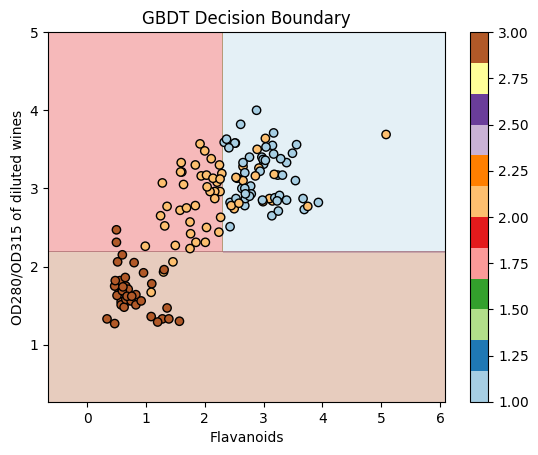

In [35]:
import matplotlib.pyplot as plt

# Create a mesh grid over the feature space
x_min, x_max = X_train_reduced[chosen_features[0]].min() - 1, X_train_reduced[chosen_features[0]].max() + 1
y_min, y_max = X_train_reduced[chosen_features[1]].min() - 1, X_train_reduced[chosen_features[1]].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), 
                     np.linspace(y_min, y_max, 500))

# Predict on the grid points
Z = gbdt_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Plot the training points
scatter = plt.scatter(X_train_reduced[chosen_features[0]], 
                       X_train_reduced[chosen_features[1]], 
                       c=y_train, edgecolor='k', cmap=plt.cm.Paired)

plt.xlabel(chosen_features[0])
plt.ylabel(chosen_features[1])
plt.title("GBDT Decision Boundary")
plt.colorbar(scatter)
plt.show()

/Users/lordkersting/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


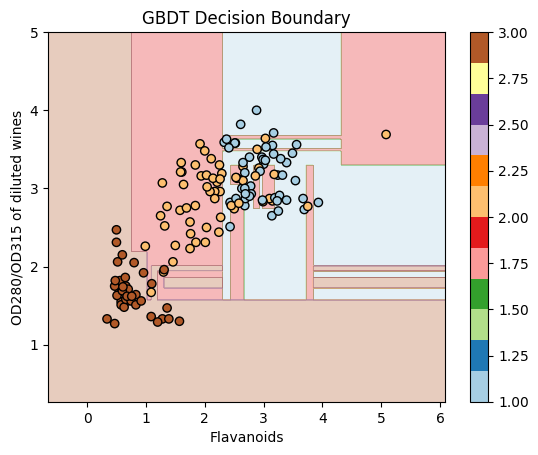

In [36]:
# Predict on the grid points
Z = gbdt_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Plot the training points
scatter = plt.scatter(X_train_reduced[chosen_features[0]], 
                       X_train_reduced[chosen_features[1]], 
                       c=y_train, edgecolor='k', cmap=plt.cm.Paired)

plt.xlabel(chosen_features[0])
plt.ylabel(chosen_features[1])
plt.title("GBDT Decision Boundary")
plt.colorbar(scatter)
plt.show()